In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. question where we can compare situation where sample mean > sample median and vice versa

- potential subquestion which uses max and min to observe outliers
- ask what is the reasonable actions to take when dealing with outliers (drop them, include them...)

In [6]:
data = pd.read_csv("prf_data/trees.csv")
data

tree_spec PlotName  TreeID  TreeSpec Origin Status   DBH CrownClass  \
0              1   PRF001    24.0         1      P      D  10.1        NaN   
1              1   PRF001    46.0         1      P      D   9.9        NaN   
2              2   PRF001    20.0         2      N      L  67.5          D   
3              2   PRF001    50.0         2      N      L  57.9          D   
4              1   PRF001    10.0         1      N      L  55.9          D   
...          ...      ...     ...       ...    ...    ...   ...        ...   
12585         30   PRF334     NaN        30      N      L   3.7        NaN   
12586         30   PRF334     NaN        30      N      L   3.3        NaN   
12587         30   PRF334     NaN        30      N      L   3.2        NaN   
12588         30   PRF334     NaN        30      N      L   3.0        NaN   
12589         30   PRF334     NaN        30      N      L   2.7        NaN   

      QualityClass  DecayClass  ...     BA_all  TPH_all codom      domht  \
0              NaN         1.0  ...  33.601655     2688     N  12.223077   
1              NaN         2.0  ...  33.601655     2688     N  12.223077   
2                A         NaN  ...  33.601655     2688     Y  33.433333   
3                U         NaN  ...  33.601655     2688     Y  33.433333   
4                A         NaN  ...  33.601655     2688     Y  33.433333   
...            ...         ...  ...        ...      ...   ...        ...   
12585          NaN         NaN  ...  27.644145     2712     N  13.266667   
12586          NaN         NaN  ...  27.644145     2712     N  13.266667   
12587          NaN         NaN  ...  27.644145     2712     N  13.266667   
12588          NaN         NaN  ...  27.644145     2712     N  13.266667   
12589          NaN         NaN  ...  27.644145     2712     N  13.266667   

       ht_meas  stems       mvol       tvol       biomass   size  
0          NaN     16   0.000000   0.708735    393.396400  Poles  
1          NaN     16   0.000000   0.673254    375.305379  Poles  
2         33.9     16  77.327438  79.482658  39691.639950  Large  
3          NaN     16  56.444281  58.117292  28251.255888  Large  
4         33.0     16  48.008649  49.833743  24501.838779  Large  
...        ...    ...        ...        ...           ...    ...  
12585      NaN    200   0.000000   0.858564    851.191939  Under  
12586      8.5    200   0.000000   0.653868    659.084439  Under  
12587      NaN    200   0.000000   0.607493    615.333049  Under  
12588      7.4    200   0.000000   0.469656    521.064025  Under  
12589      NaN    200   0.000000   0.404460    421.730740  Under  

[12590 rows x 27 columns]

In [17]:
#x = plt.scatter(data["tree_spec"],data["TPH_all"])

stats = data.groupby('tree_spec')["TPH_all"].agg(['max', 'min', 'median', 'mean'])
stats

max   min  median         mean
tree_spec                                  
1          15392    48  1792.0  2812.875406
2          15392    96  2180.0  2053.797101
3           8688   480  1344.0  1411.899497
12         15392    48  1752.0  2127.724138
13          6224   496  1792.0  1785.444109
19          2968  1000  1952.0  1790.808511
20         15392   256  1944.0  2103.822703
22          6224   560  1968.0  3714.440678
25          9248   512  1864.0  2381.089286
30          5256   336  1528.0  1631.692308
32          9248    96  2080.0  2181.414044
37          5256   360  1488.0  1717.824000
38         15392   272  2456.0  3005.077626
41          5512    16  1868.0  1929.337884
44          5904   360  1424.0  1634.393162
45          6224   512  2176.0  3229.404444
46          2696   872  2264.0  2079.304348
50          2568  1080  1200.0  1523.636364
51          3320   360  1528.0  1676.279070
56          6920   448  1736.0  1787.419355
58          2208   976  1232.0  1396.363636
70          4088   176  1456.0  1688.612245
73          4120  1968  4120.0  3402.666667
74          6920   552  2208.0  2374.572864

***Is there anything you noitce about this dataset? in particualar the Max values?***

C:\Users\Gur\AppData\Local\Temp\ipykernel_18212\1317715690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='tree_spec', y='TPH_all', palette='Set2')


<Axes: xlabel='tree_spec', ylabel='TPH_all'>

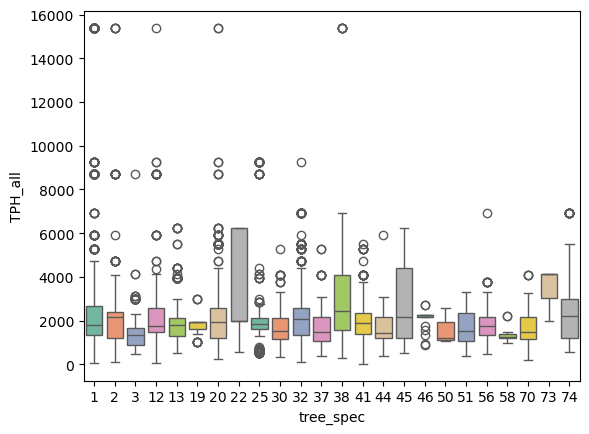

In [34]:
sns.boxplot(data=data, x='tree_spec', y='TPH_all', palette='Set2')

As we can see, while the majority of the values fall below 6,000, there are several noticeable outliers that could significantly skew the results of many models. This raises an important question: should we remove these outliers, or include them in our analysis moving forward? The answer depends on the context and purpose of the analysis. If the outliers represent genuine observations and are relevant to the problem at hand, it may be appropriate to include them, possibly with robust modeling techniques that can handle their influence (which will be covered in later chapters). However, if they result from data entry errors or are not representative of the population you're studying, excluding them could be justified.

Regardless of the approach you choose, the key takeaway is this: always visualize your data before drawing conclusions. Relying solely on summary statistics from earlier steps can be misleading, as they often fail to reveal the full distribution and nuances of the dataset.

2. question exploring some aggragated data. Like the combination of two features, like L/100km
- maybe some interaction like color by species

3. make another correlation/co varience question
- insert some aside from my stat302 class
- maybe try to guide thru manually dopping some features - which will be done automatically by lasso and ridge later on

c:\Users\Gur\miniconda3\envs\gem530\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


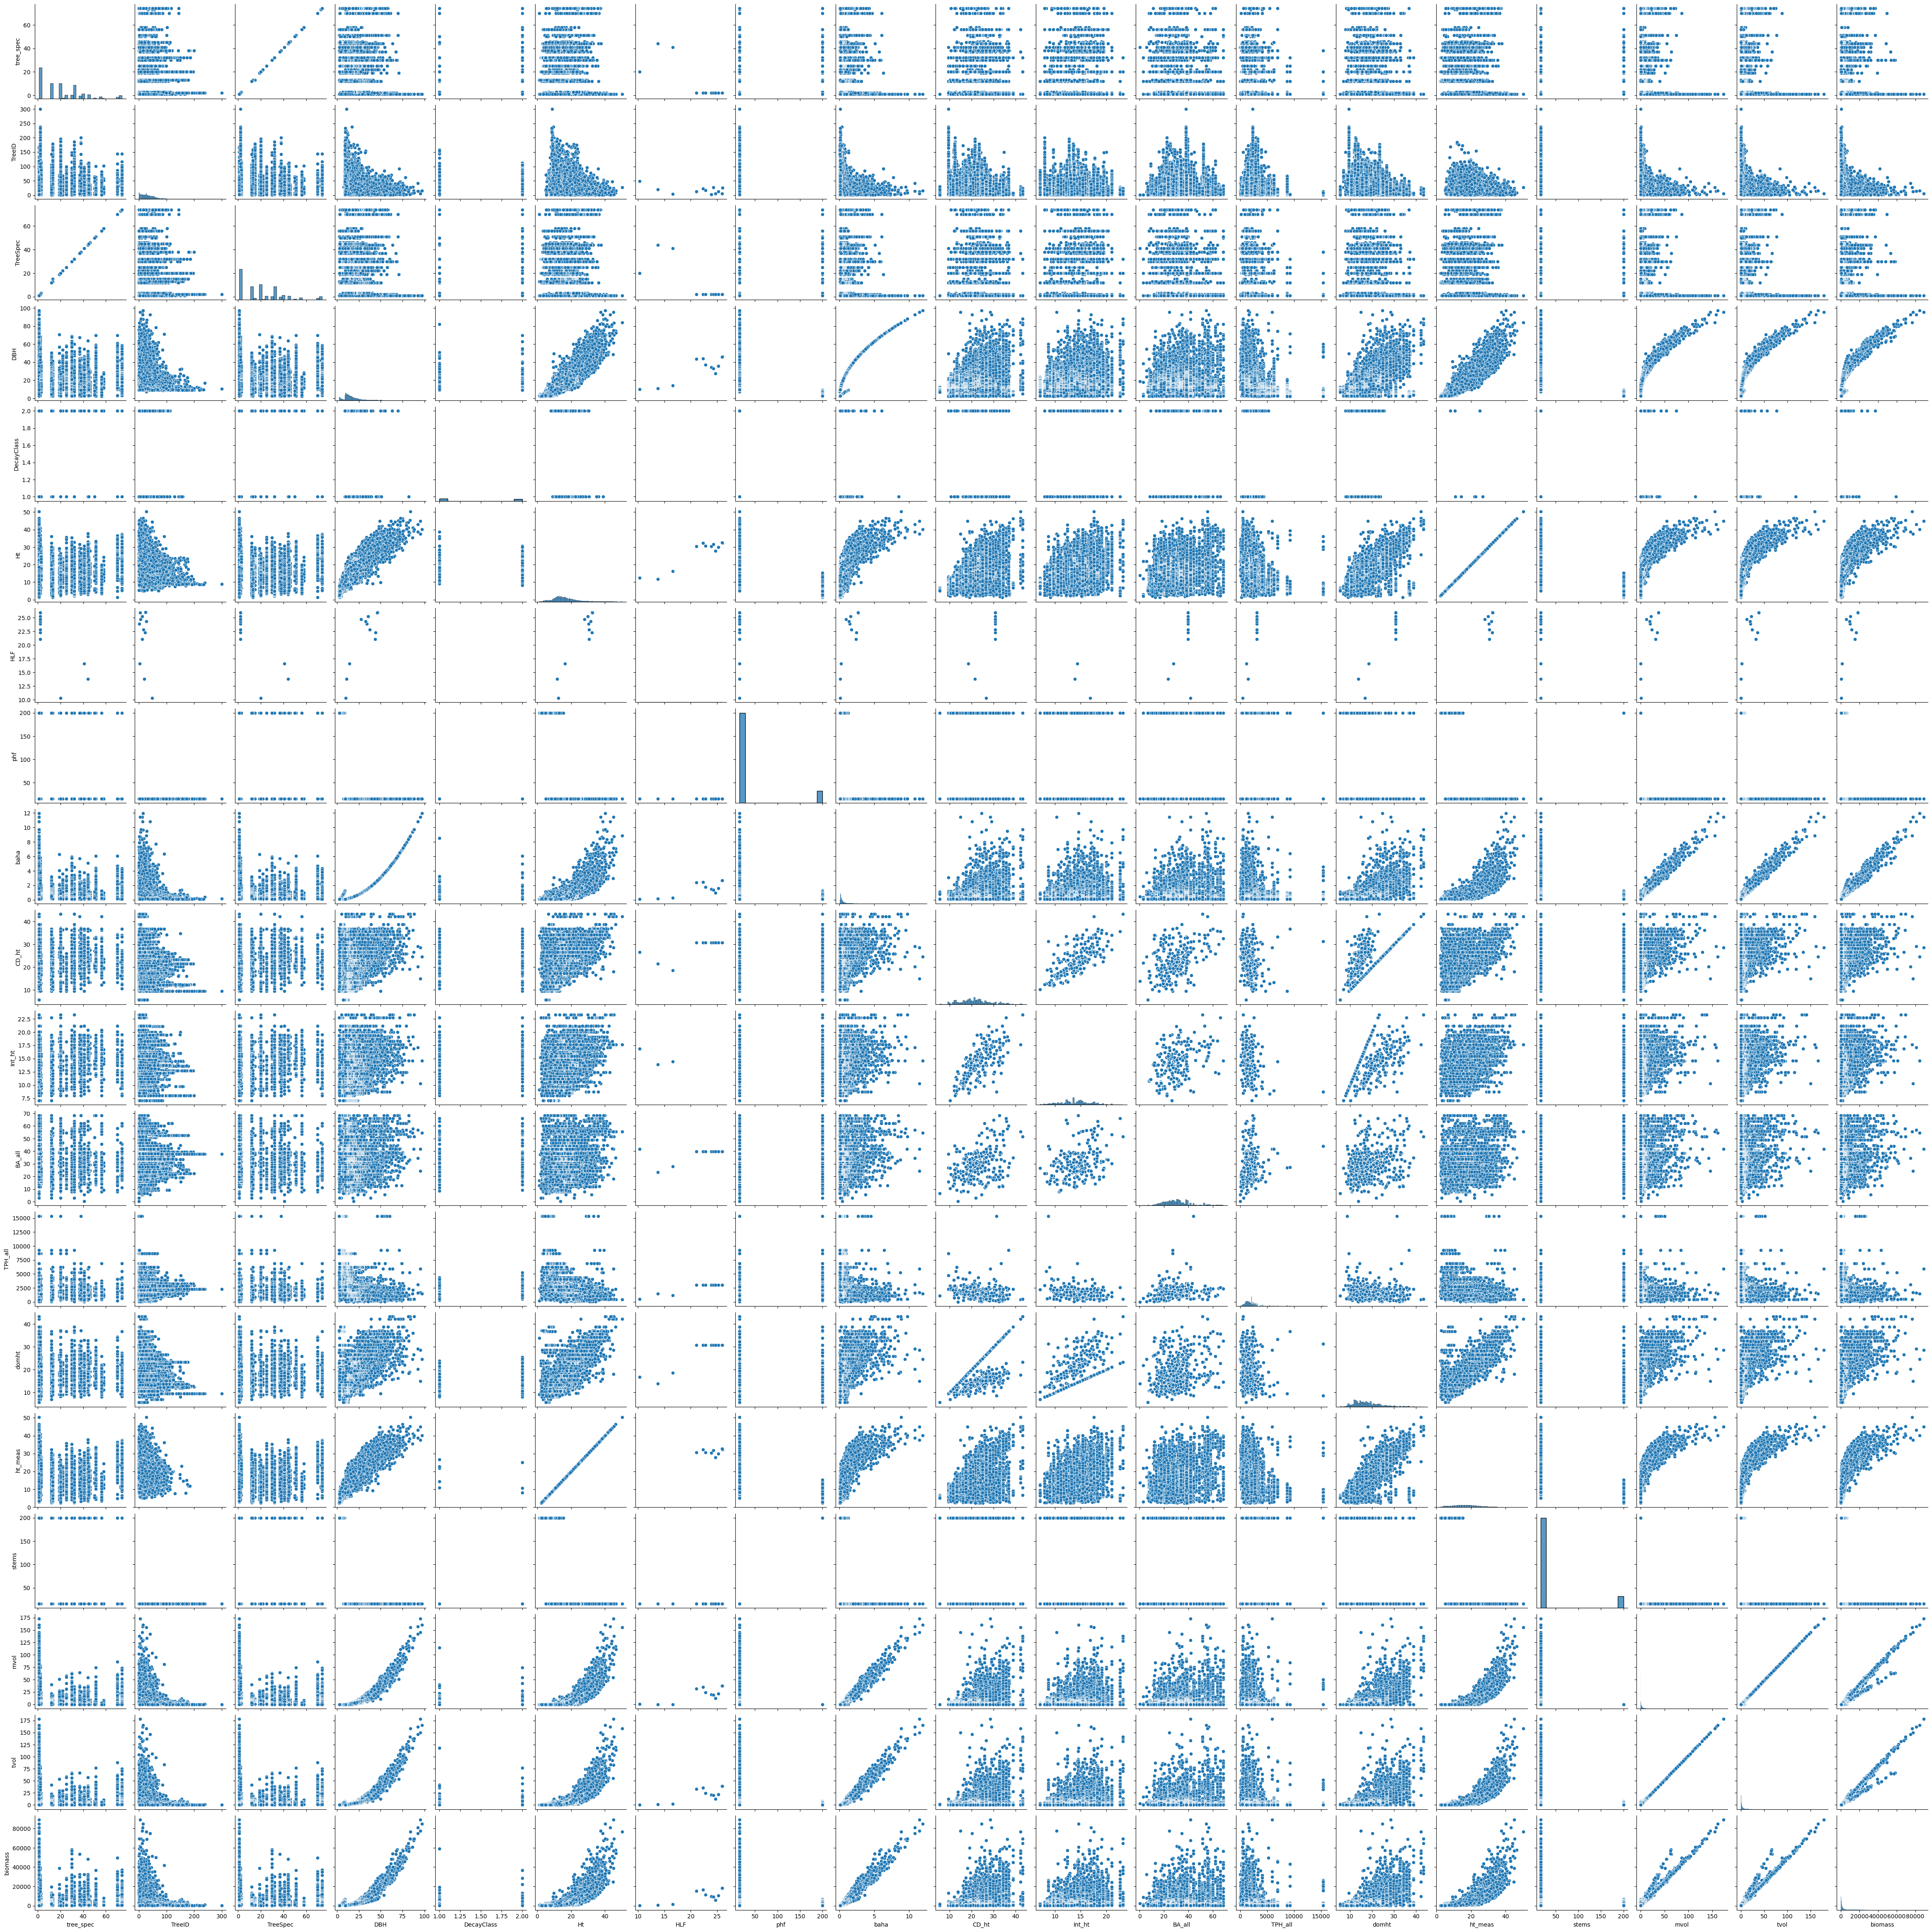

In [35]:
sns.pairplot(data)